In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
import os

In [60]:
parkinsons = pd.read_csv("/kaggle/input/m19-par/parkinsons.csv")
#this will load the data from the csv file to pandas dataframe

In [61]:
parkinsons.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [62]:
# number of rows and columns in the dataframe
parkinsons.shape

(195, 24)

In [63]:
parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [64]:
# checking for missing values in each column
parkinsons.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [65]:
parkinsons.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [66]:
#parkinsons.groupby('status').mean()
# grouping the data based on the target variable
numeric_features = parkinsons.select_dtypes(include=np.number)
parkinsons.groupby('status')[numeric_features.columns].mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.028511,0.011483,24.678750,0.0,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.053027,0.029211,20.974048,1.0,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [67]:
parkinsons['status'].value_counts()
# counts frequency of each unique value

status
1    147
0     48
Name: count, dtype: int64

In [68]:
parkinsons['status'].value_counts(normalize=True)

status
1    0.753846
0    0.246154
Name: proportion, dtype: float64

<Axes: ylabel='count'>

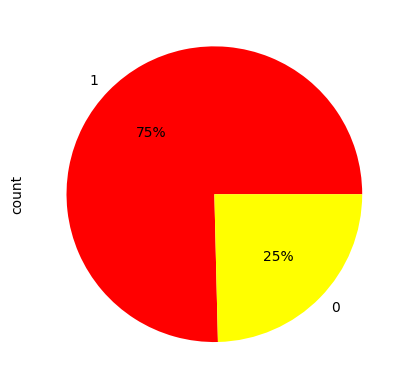

In [69]:
# pie chart
# visualize the distribution of the status column 
parkinsons['status'].value_counts().plot(kind='pie', autopct="%1.0f%%", colors=['red', 'yellow'])

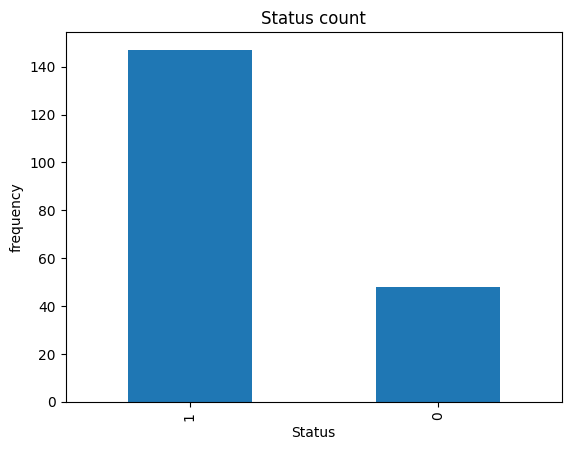

In [70]:
frequency=parkinsons['status'].value_counts()
frequency.plot(kind = "bar")
plt.title("Status count")
plt.xlabel("Status")
plt.ylabel("frequency")
plt.show()

array([[<Axes: title={'center': 'MDVP:Fo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Fhi(Hz)'}>,
        <Axes: title={'center': 'MDVP:Flo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Jitter(%)'}>,
        <Axes: title={'center': 'MDVP:Jitter(Abs)'}>],
       [<Axes: title={'center': 'MDVP:RAP'}>,
        <Axes: title={'center': 'MDVP:PPQ'}>,
        <Axes: title={'center': 'Jitter:DDP'}>,
        <Axes: title={'center': 'MDVP:Shimmer'}>,
        <Axes: title={'center': 'MDVP:Shimmer(dB)'}>],
       [<Axes: title={'center': 'Shimmer:APQ3'}>,
        <Axes: title={'center': 'Shimmer:APQ5'}>,
        <Axes: title={'center': 'MDVP:APQ'}>,
        <Axes: title={'center': 'Shimmer:DDA'}>,
        <Axes: title={'center': 'NHR'}>],
       [<Axes: title={'center': 'HNR'}>,
        <Axes: title={'center': 'status'}>,
        <Axes: title={'center': 'RPDE'}>,
        <Axes: title={'center': 'DFA'}>,
        <Axes: title={'center': 'spread1'}>],
       [<Axes: title={'center': 'spread2'}>,
   

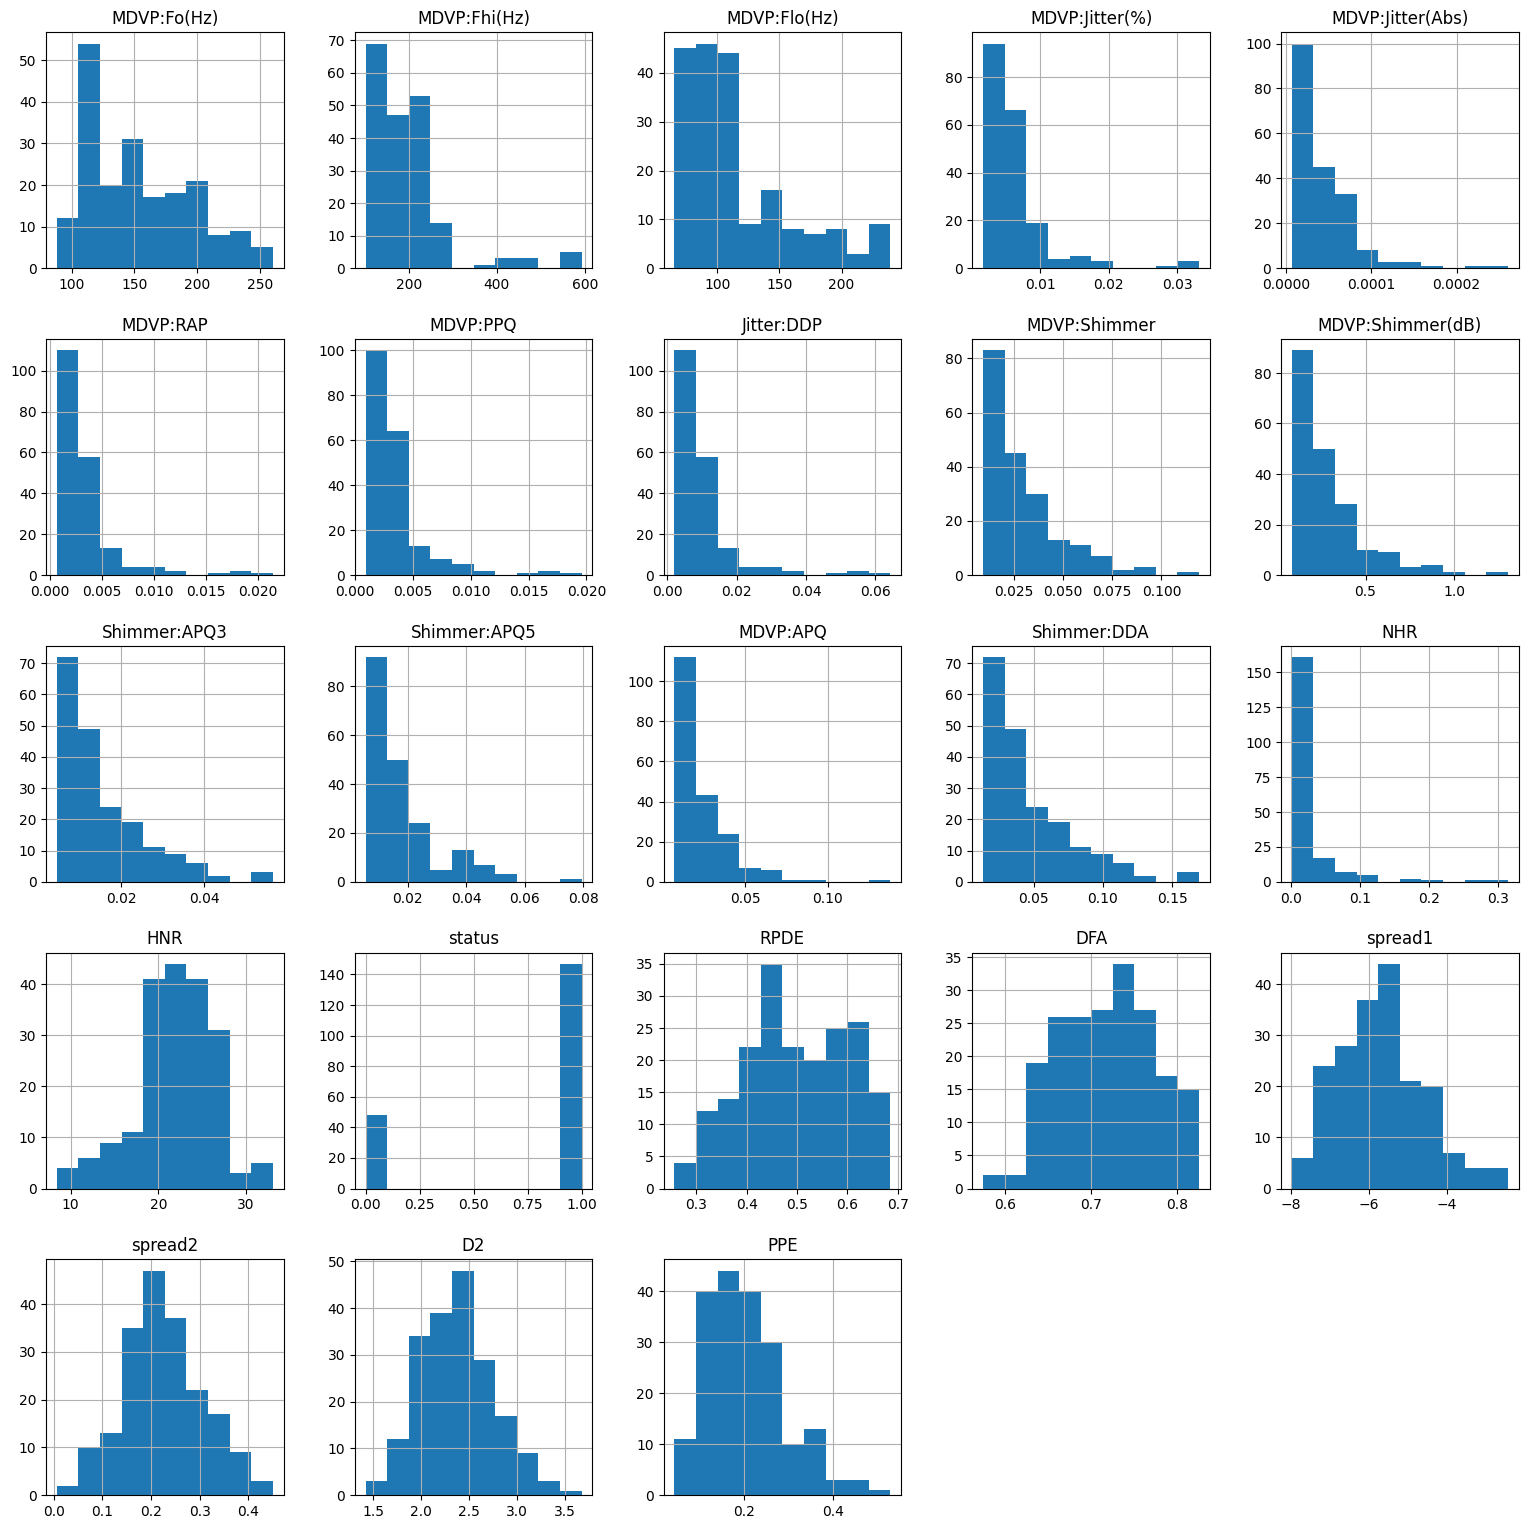

In [71]:
parkinsons.hist(figsize=(19,19))

/tmp/ipykernel_201/3378275559.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( parkinsons[parkinsons.status == 0]['spread1'], color = 'r')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_201/3378275559.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (a

<Axes: xlabel='spread1', ylabel='Density'>

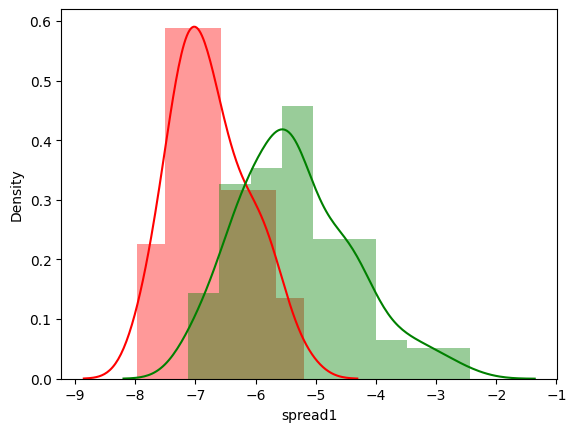

In [72]:
sns.distplot( parkinsons[parkinsons.status == 0]['spread1'], color = 'r')
sns.distplot( parkinsons[parkinsons.status == 1]['spread1'], color = 'g')
#Spread1 is normally distributed between person who have PD and who is normal. People who have spread1 between - 8.5 and -7.5 are more and they are normal. People whose spread1 is between -6.5 and -5 are having PD

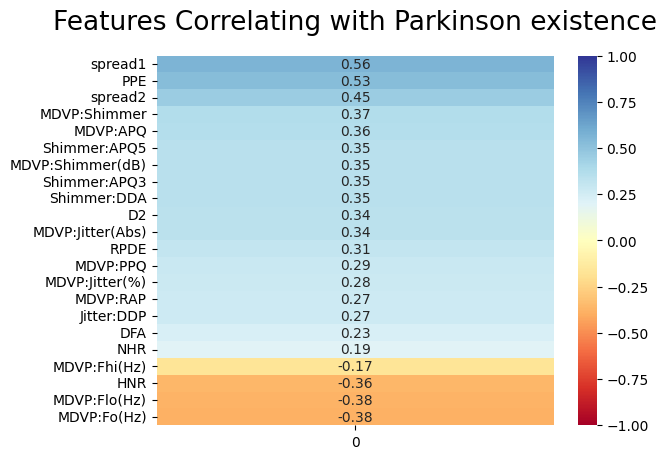

In [73]:
numeric_features = parkinsons.select_dtypes(include=np.number)

numeric_features=numeric_features.drop(['status'],axis=1)

# Calculate correlation on numeric columns with 'status'
correlation_with_status = numeric_features.corrwith(parkinsons['status'])

# Sort the correlations
sorted_correlations = correlation_with_status.sort_values(ascending=False)

heatmap = sns.heatmap(sorted_correlations.to_frame(), vmin=-1, vmax=1, annot=True, cmap='RdYlBu') # Convert Series to DataFrame for heatmap
heatmap.set_title('Features Correlating with Parkinson existence', fontdict={'fontsize':19}, pad=19);

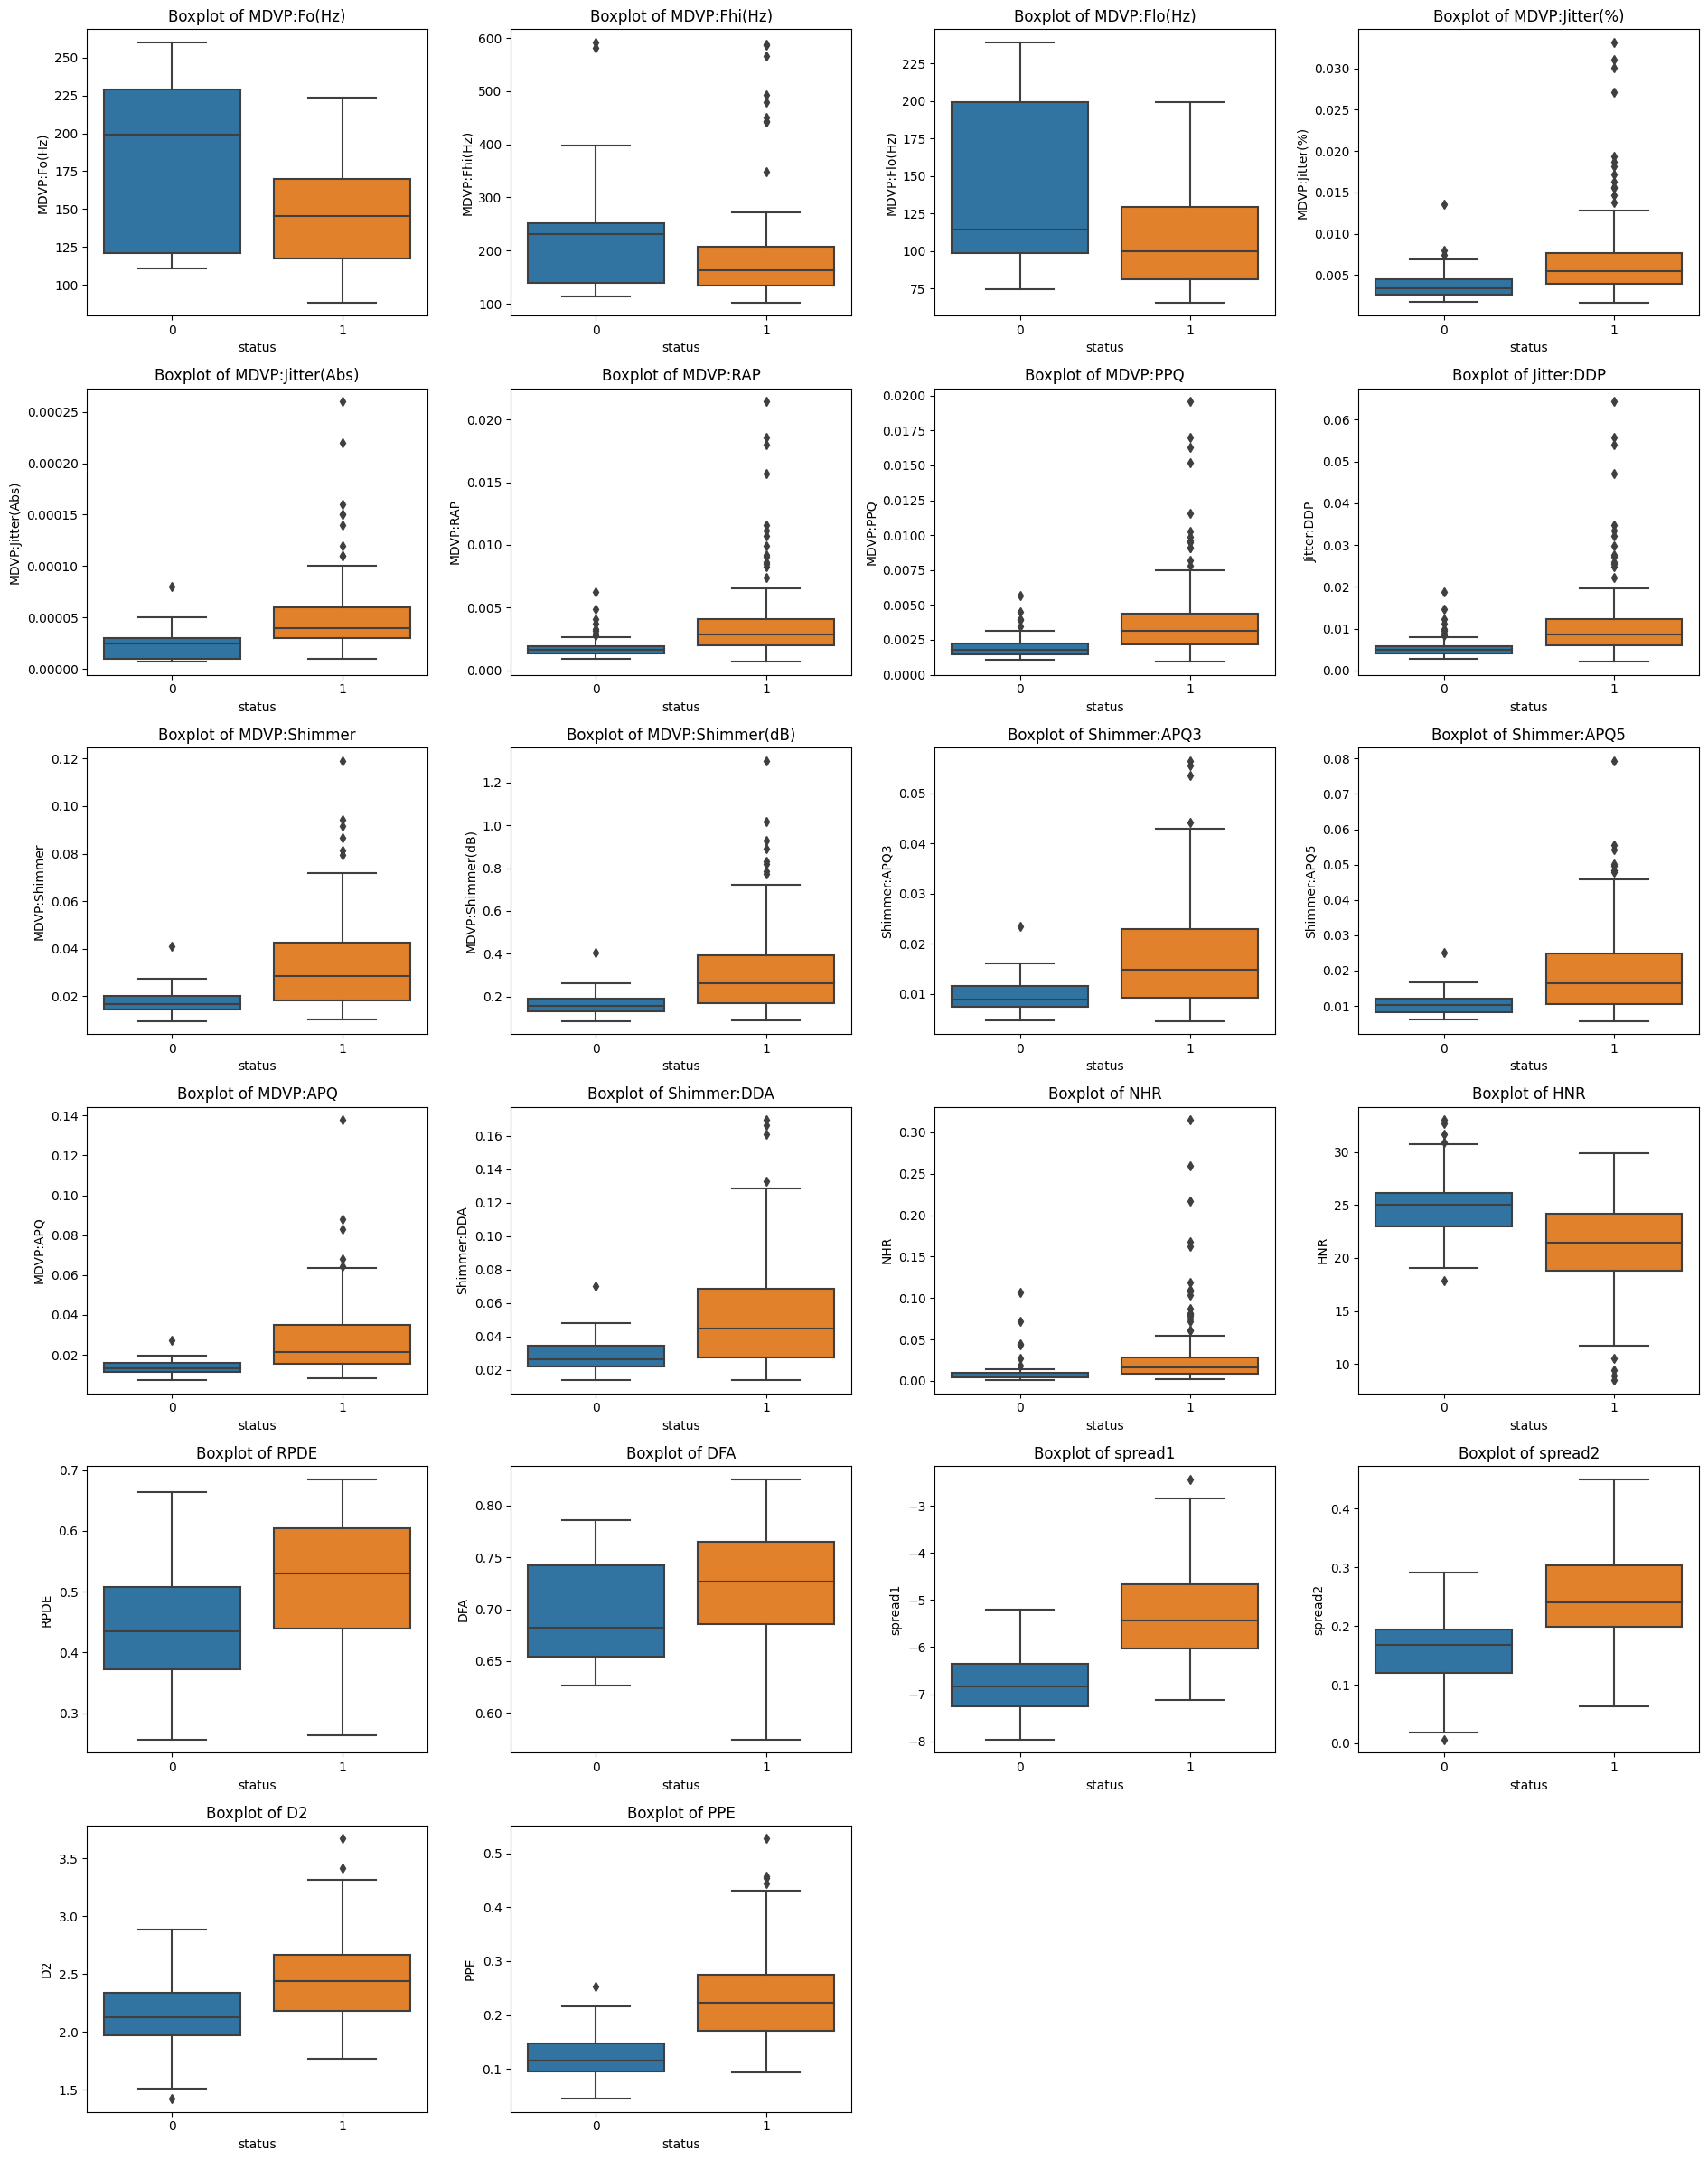

In [74]:
features= parkinsons.drop(['name','status'],axis=1).columns

num_features = len(features)
num_cols = 4 
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(19, 4*num_rows))

for i, feature in enumerate(features):
    row_index = i // num_cols  # Calculate the row index for subplot
    col_index = i % num_cols   # Calculate the column index for subplot
    sns.boxplot(x=parkinsons['status'], y=parkinsons[feature], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Boxplot of {feature}')

# Hide empty subplots if necessary
for i in range(num_features, num_rows*num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    fig.delaxes(axes[row_index, col_index])

plt.tight_layout()
plt.show()

<Axes: xlabel='status', ylabel='MDVP:Fo(Hz)'>

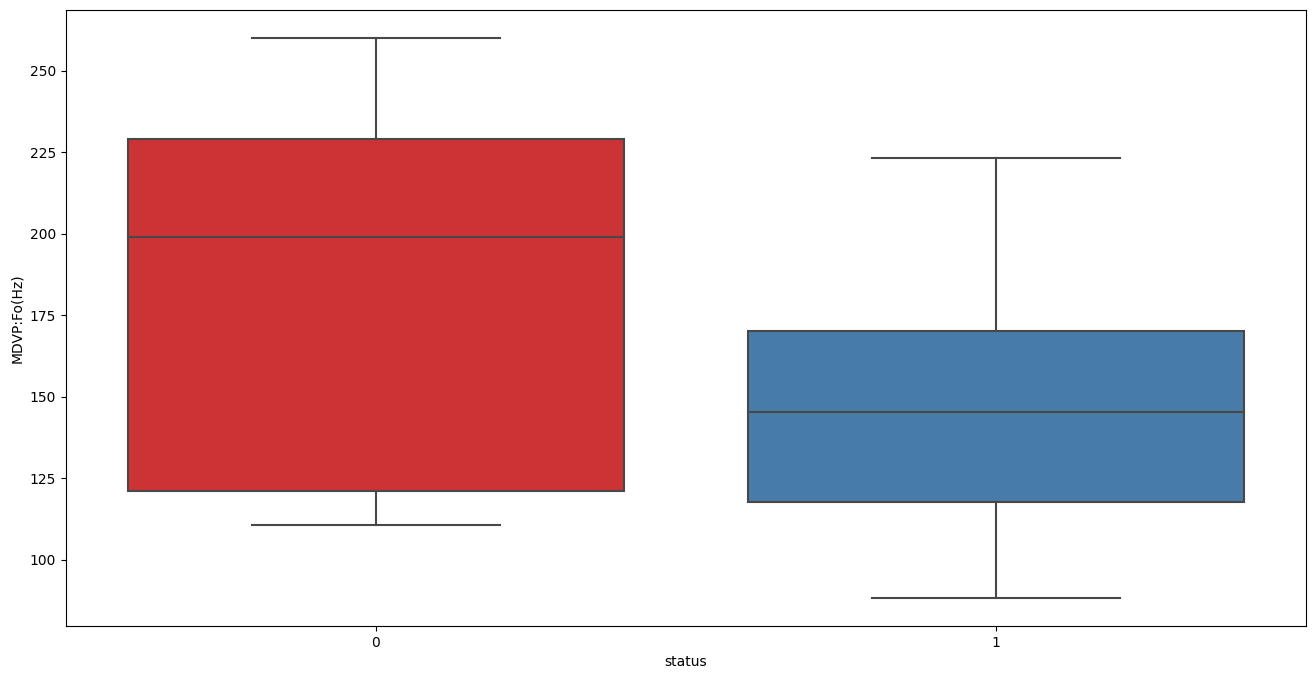

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.boxplot(x='status', y='MDVP:Fo(Hz)', data=parkinsons, palette="Set1", ax=ax) # Changed ax[1] to ax
#When we look the relationship between status and MDVP:Fo(Hz) we can see the median value is around 199 Hz for people who are normal. For people who are affected with Parkinsons the median value comes around 145 Hz

<Axes: >

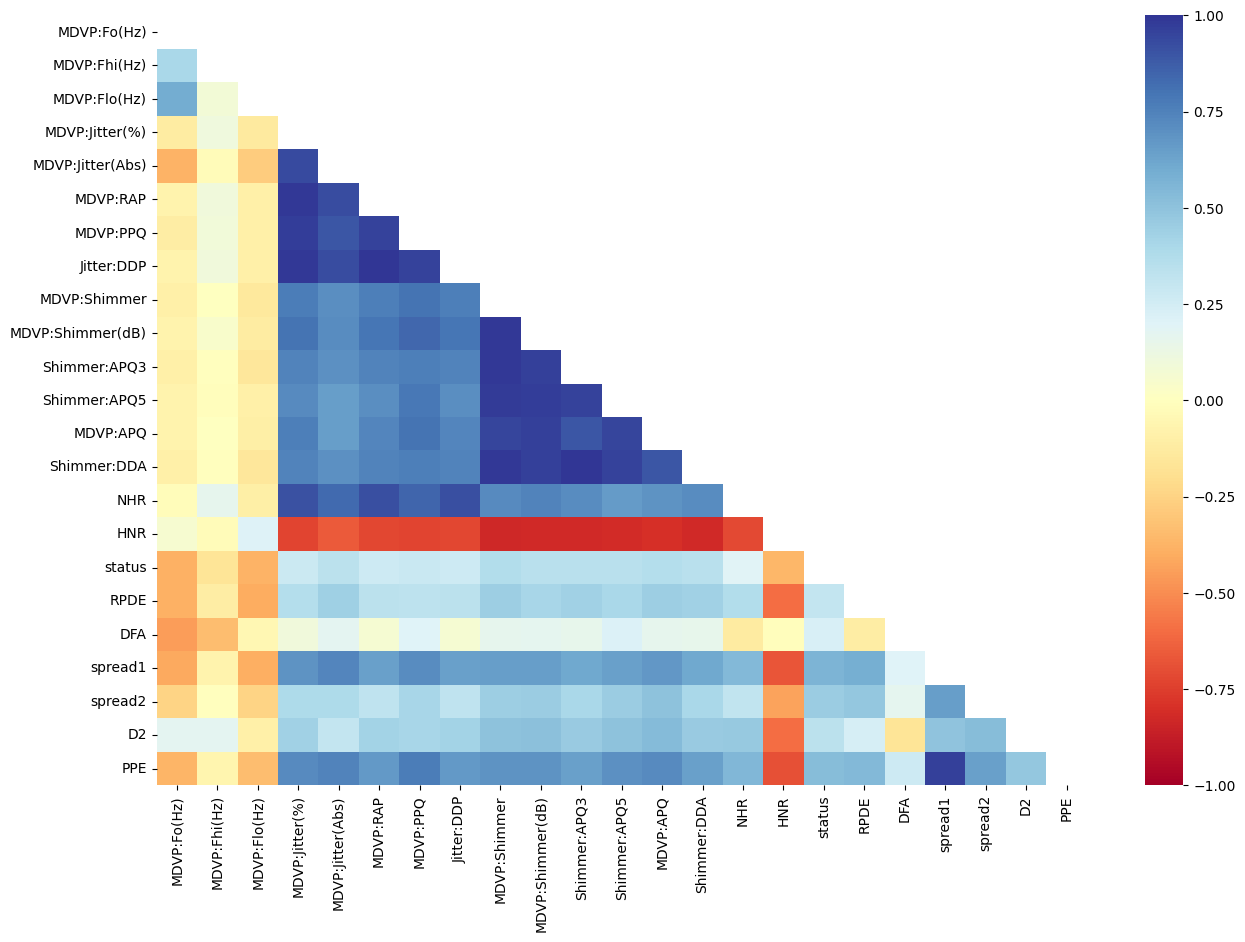

In [76]:
plt.figure(figsize=(15, 10))

# Select only numeric features for correlation analysis
numeric_features = parkinsons.select_dtypes(include=np.number)

mask = np.triu(np.ones_like(numeric_features.corr(), dtype=bool))

# Generate heatmap
sns.heatmap(numeric_features.corr(), vmin=-1, vmax=1, cmap='RdYlBu', mask=mask)

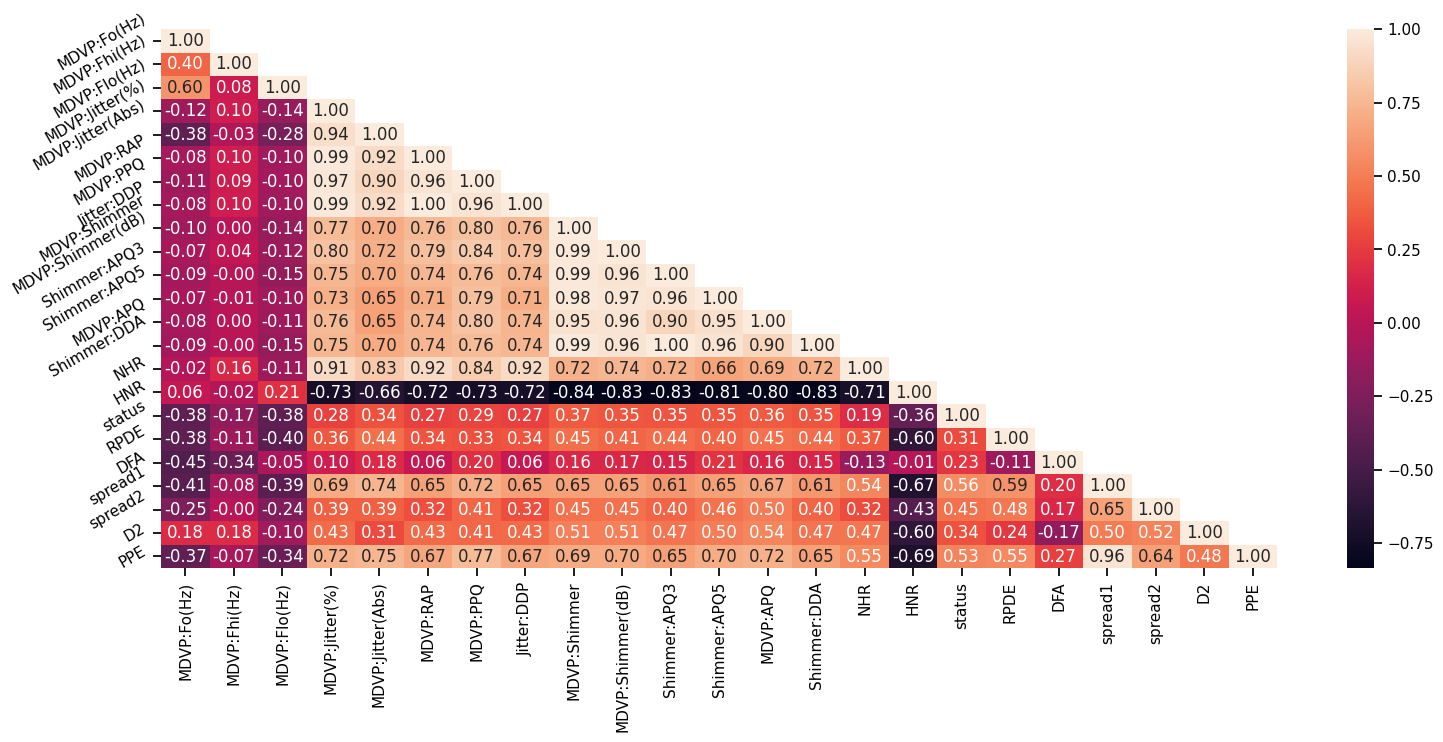

In [77]:
data_ = parkinsons.drop('name',axis=1)

corr = data_.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(18,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)
#MDVP:Jitter(%) has a very high correlation with MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP MDVP:Shimmer has a very correlation with MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA this may be because they are related to each other. This may be because multi-dimensinal voice programs analysis is closely related with these variables The target variable status has a weak positive corelation with spread1

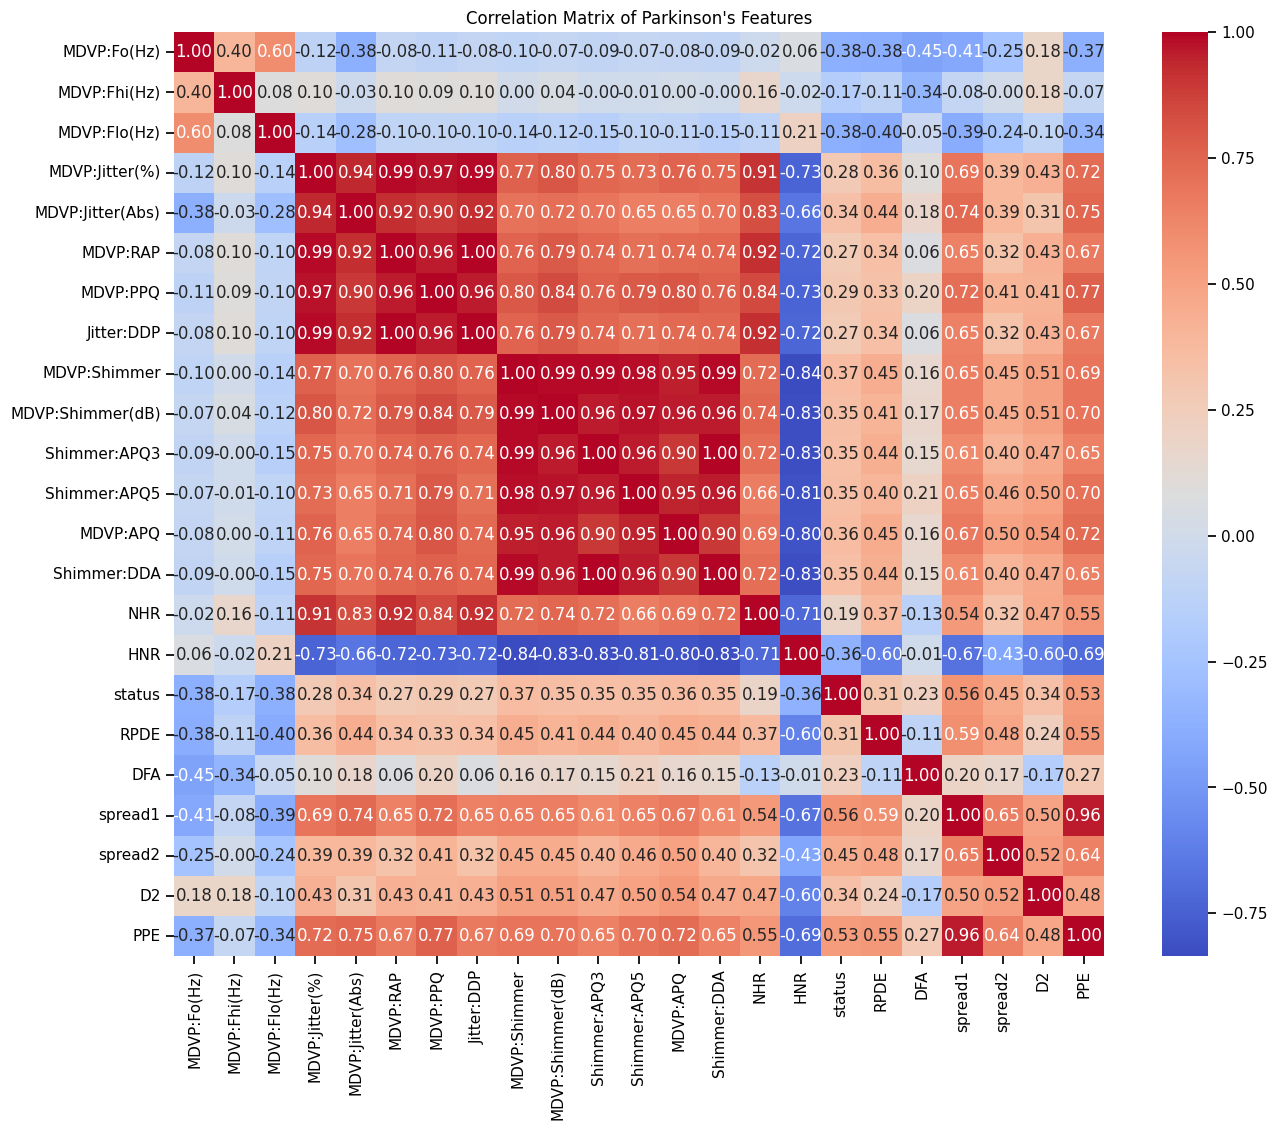

In [78]:
# Correlation matrix heatmap (excluding the 'name' column)
plt.figure(figsize=(15, 12))
sns.heatmap(parkinsons.drop(columns=['name']).corr(), annot=True, cmap='coolwarm', fmt=".2f") # Drop the 'name' column
plt.title('Correlation Matrix of Parkinson\'s Features')
plt.show()
# The correlation matrix heatmap displays the correlation between different features.
# Features highly correlated with 'status' are potential good predictors.
# Highly correlated features might indicate redundancy.

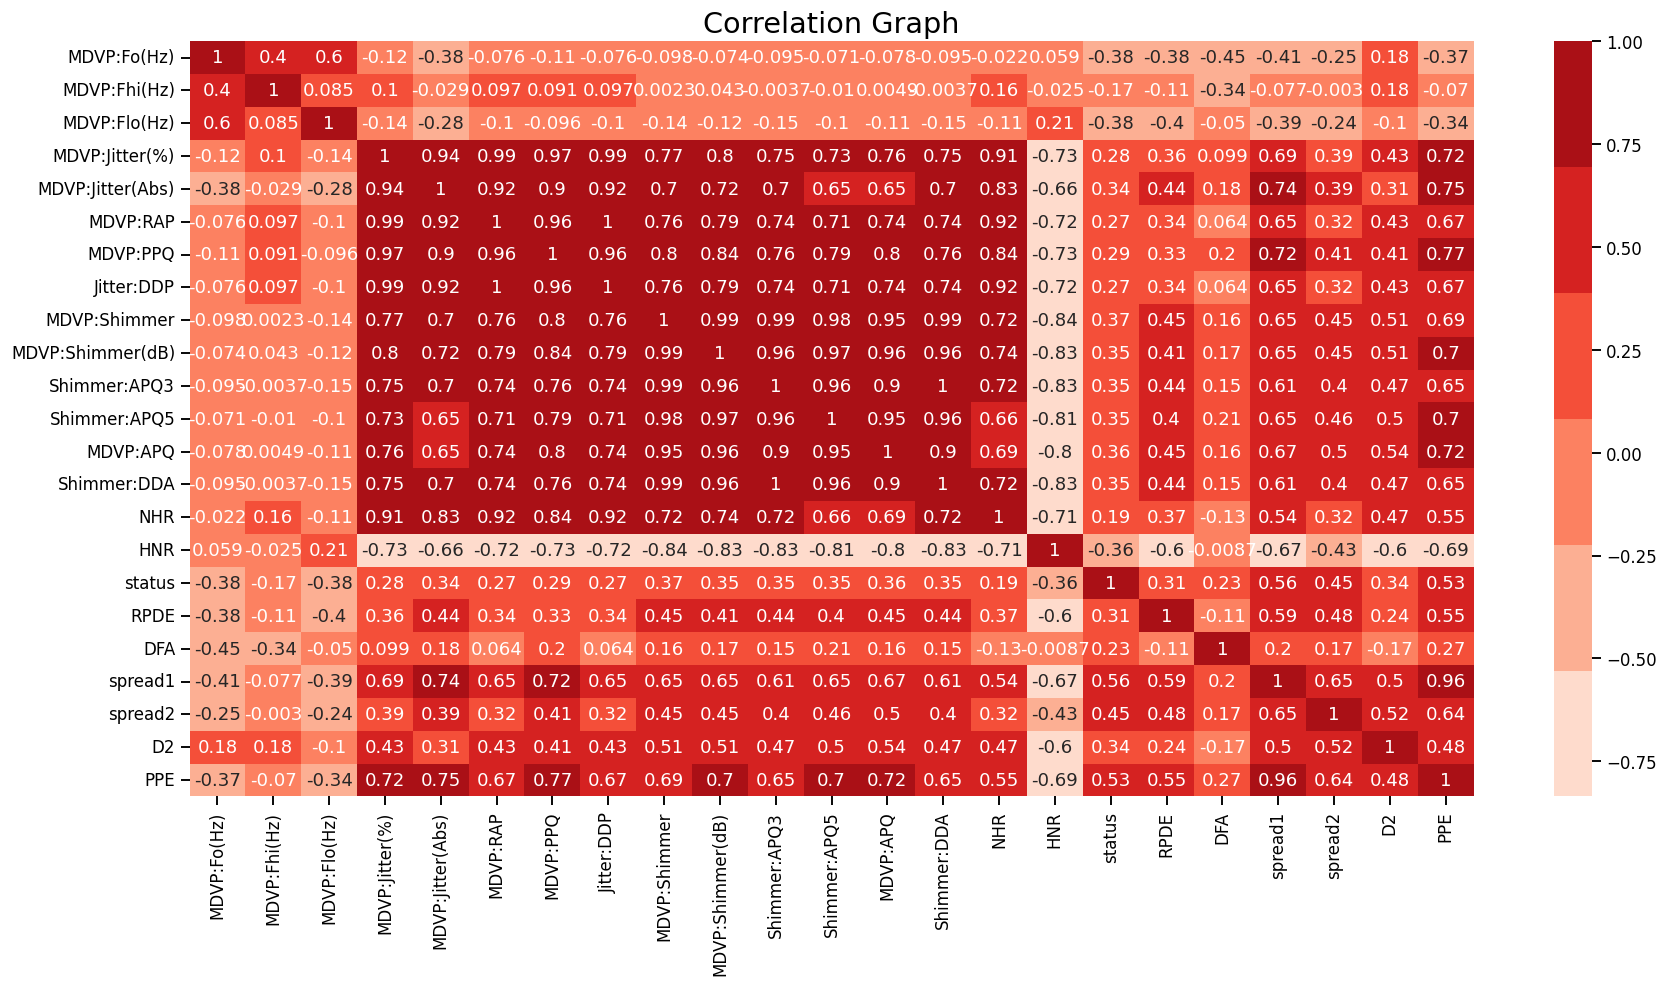

In [79]:
plt.figure(figsize=[19, 9], dpi=109)
plt.title("Correlation Graph", fontsize=19)

numerical=parkinsons.drop('name', axis=1)

cmap = sns.color_palette("Reds")

sns.heatmap(numerical.corr(), annot=True, cmap=cmap)

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

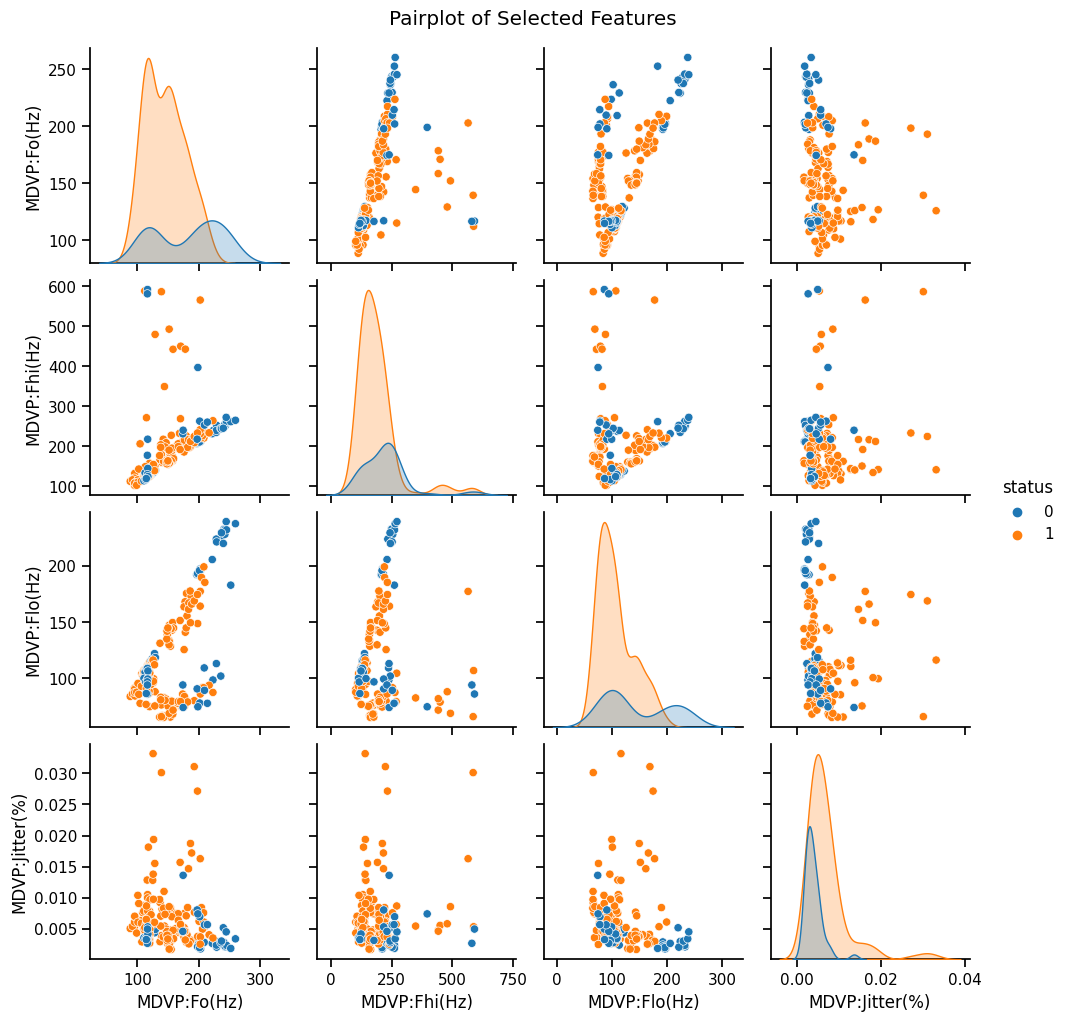

In [80]:
# Pairplot for selected features
selected_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'status']
sns.pairplot(parkinsons[selected_features], hue='status')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()
# The pairplot shows the relationship between pairs of selected features, color-coded by the status. This helps visualize how different features might separate the two classes.  Look for features that show distinct distributions for the two groups.

Separating the features (x__) from the target variable (y__).

'status' column represents the target variable or the outcome we want the machine learning model to predict 

In [81]:
x__=parkinsons.drop(['name','status'],axis=1)
#  (independent variables)
y__=parkinsons["status"]
#  (dependent variable)

In [82]:
# --- Feature Engineering ---
x__['Jitter_Shimmer_Ratio'] = x__['MDVP:Jitter(%)'] / x__['MDVP:Shimmer']
x__['HNR_RPDE_Ratio'] = x__['HNR'] / x__['RPDE']
x__['Spread1_Spread2_Diff'] = x__['spread1'] - x__['spread2']


# Combining Jitter and Shimmer (Adding)
x__['Jitter_Shimmer_Sum'] = x__['MDVP:Jitter(%)'] + x__['MDVP:Shimmer']

# Interaction between HNR and Spread1
x__['HNR_Spread1_Product'] = x__['HNR'] * x__['spread1']

# Logarithmic transformations can help normalize data and make relationships between features more linear. 
# Non-linear transformation (using NumPy's log function)
# (ensure values are positive before taking the log)
x__['PPE_log'] = np.log(x__['PPE'] + 1e-10)  # Adding a small value to avoid log(0)

# Creating a categorical feature based on frequency (Fo)
x__['Fo_Category'] = pd.cut(x__['MDVP:Fo(Hz)'], bins=[0, 150, 200, float('inf')],
                             labels=['Low', 'Mid', 'High'])

# Rolling Window Statistics
x__['Shimmer_MovingAvg'] = (
    x__['MDVP:Shimmer'].rolling(window=3,center=True,min_periods=1).mean()
)

In [83]:
x__.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,D2,PPE,Jitter_Shimmer_Ratio,HNR_RPDE_Ratio,Spread1_Spread2_Diff,Jitter_Shimmer_Sum,HNR_Spread1_Product,PPE_log,Fo_Category,Shimmer_MovingAvg
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,2.301442,0.284654,0.179241,50.708443,-5.079513,0.05158,-101.232481,-1.256481,Low,0.052540
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,2.486855,0.368674,0.157809,41.637668,-4.410782,0.07102,-77.775039,-0.997842,Low,0.052470
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,2.342259,0.332634,0.200650,48.037311,-4.754352,0.06283,-91.756090,-1.100712,Low,0.056197
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,2.405554,0.368975,0.181537,47.460854,-4.451648,0.06489,-85.001691,-0.997026,Low,0.057167
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,2.332180,0.410335,0.199844,47.079711,-3.982300,0.07709,-73.640267,-0.890781,Low,0.055393


In [84]:
x__.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   MDVP:Fo(Hz)           195 non-null    float64 
 1   MDVP:Fhi(Hz)          195 non-null    float64 
 2   MDVP:Flo(Hz)          195 non-null    float64 
 3   MDVP:Jitter(%)        195 non-null    float64 
 4   MDVP:Jitter(Abs)      195 non-null    float64 
 5   MDVP:RAP              195 non-null    float64 
 6   MDVP:PPQ              195 non-null    float64 
 7   Jitter:DDP            195 non-null    float64 
 8   MDVP:Shimmer          195 non-null    float64 
 9   MDVP:Shimmer(dB)      195 non-null    float64 
 10  Shimmer:APQ3          195 non-null    float64 
 11  Shimmer:APQ5          195 non-null    float64 
 12  MDVP:APQ              195 non-null    float64 
 13  Shimmer:DDA           195 non-null    float64 
 14  NHR                   195 non-null    float64 
 15  HNR   

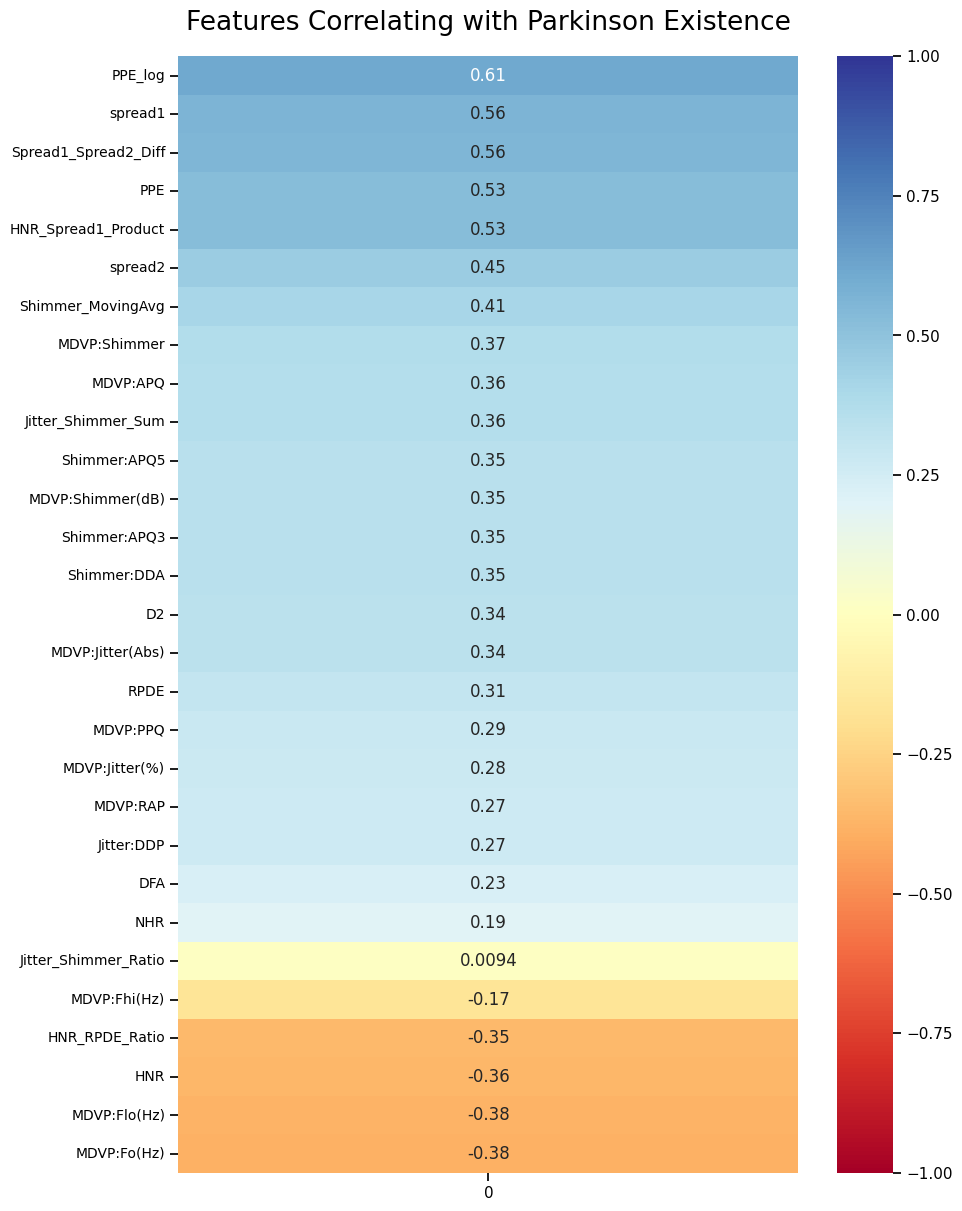

In [85]:
numeric_features = x__.select_dtypes(include=np.number)
#These are the features that will be used for correlation analysis.

# Calculate correlation on numeric columns with 'status'
correlation_with_status = numeric_features.corrwith(y__)


sorted_correlations = correlation_with_status.sort_values(ascending=False)


# Adjust the figure size based on the number of features
plt.figure(figsize=(10, len(sorted_correlations) / 2))  

# Convert the series to a DataFrame for heatmap
heatmap = sns.heatmap(sorted_correlations.to_frame(), 
                      vmin=-1, vmax=1, annot=True, cmap='RdYlBu', cbar=True)

# Rotate y-axis labels 
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=10)

# Set title
heatmap.set_title('Features Correlating with Parkinson Existence', 
                  fontdict={'fontsize':19}, pad=19)
plt.show()


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
# --- One-Hot Encoding ---
x__ = pd.get_dummies(x__, columns=['Fo_Category'], drop_first=True)

# --- Data Splitting --- reproducible
X_train, X_test, y_train, y_test = train_test_split(x__, y__, test_size=0.2, random_state=7)

# --- Address Class Imbalance (SMOTE) ---
smote = SMOTE(random_state=7)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# --- Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)
print('-----------------------------------------------------------------------')
print(X_test_scaled)

[[-0.34548833  0.12997568 -0.92535371 ... -0.45547252 -0.6074929
  -0.65465367]
 [ 0.48324609 -0.00476723  0.87897582 ... -0.68291978  1.64610978
  -0.65465367]
 [-1.07490447 -0.87770538 -0.50446208 ...  1.47736595 -0.6074929
  -0.65465367]
 ...
 [ 0.84609448  0.78907805 -0.99202615 ...  0.01726549 -0.6074929
   1.52752523]
 [ 0.74817455  0.13253126  1.15191541 ... -0.94310198  1.64610978
  -0.65465367]
 [-0.90356554 -0.48101605 -0.38911628 ... -0.65856027 -0.6074929
  -0.65465367]]
-----------------------------------------------------------------------
[[ 0.97547447  0.67395553 -0.77944034 ...  0.36514422 -0.6074929
   1.52752523]
 [-0.7228852   3.45645738 -0.80272699 ... -0.71650415 -0.6074929
  -0.65465367]
 [ 0.00884949  0.03349401 -1.01868856 ...  0.47446714  1.64610978
  -0.65465367]
 ...
 [-1.43014864 -1.1780015  -0.76483206 ...  0.22061562 -0.6074929
  -0.65465367]
 [-0.23706446 -0.50049397  0.0369855  ... -0.47515991  1.64610978
  -0.65465367]
 [-0.93029012 -0.85520526 -0.7917

In [87]:
svm_model = svm.SVC(kernel='linear') 
svm_model.fit(X_train_scaled, y_train_resampled)
svm_predictions = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")

SVM Accuracy: 0.8974358974358975


Confusion Matrix:
[[ 4  3]
 [ 1 31]]

Misclassified Instances:
Number of misclassified instances: 4


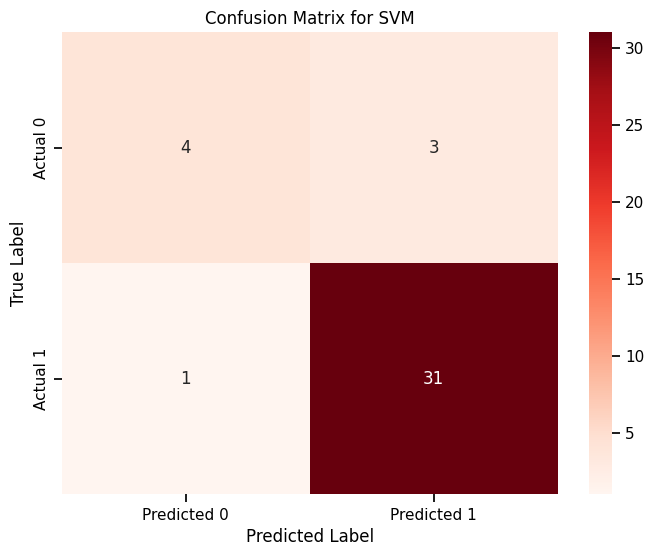

In [88]:
from sklearn.metrics import confusion_matrix
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, svm_predictions)
print("Confusion Matrix:")
print(cm)

# Calculate and print misclassified instances
misclassified_indices = np.where(y_test != svm_predictions)[0]
print("\nMisclassified Instances:")
print(f"Number of misclassified instances: {len(misclassified_indices)}")

# Optionally, print details about the misclassified instances
# for i in misclassified_indices:
#     print(f"Index: {i}, True Label: {y_test.iloc[i]}, Predicted Label: {svm_predictions[i]}")
#     # Access and print other relevant information about the misclassified instances (e.g. features)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()

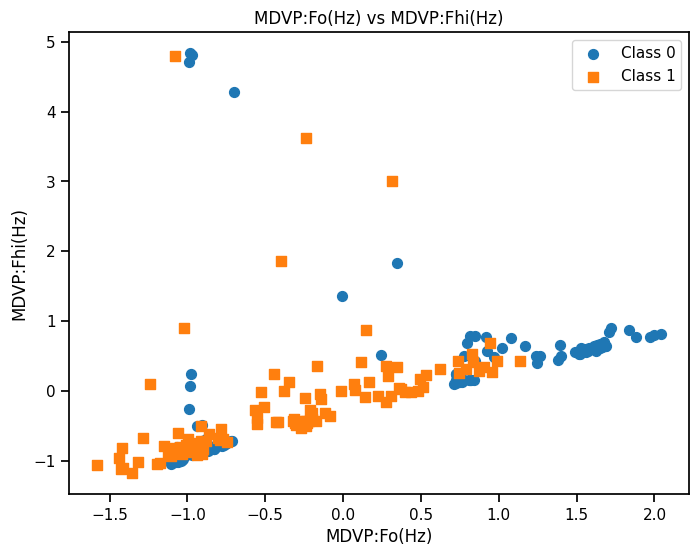

In [89]:
# Find the indices of 'MDVP:Fo(Hz)' and 'MDVP:Fhi(Hz)'
feature1_index = x__.columns.get_loc('MDVP:Fo(Hz)')
feature2_index = x__.columns.get_loc('MDVP:Fhi(Hz)')

# Extract the features for visualization
X_2d = X_train_scaled[:, [feature1_index, feature2_index]]

# Plot the data points with colors representing the classes
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[y_train_resampled == 0, 0], X_2d[y_train_resampled == 0, 1], label='Class 0', marker='o', s=50)
plt.scatter(X_2d[y_train_resampled == 1, 0], X_2d[y_train_resampled == 1, 1], label='Class 1', marker='s', s=50)

plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('MDVP:Fhi(Hz)')
plt.title('MDVP:Fo(Hz) vs MDVP:Fhi(Hz)')
plt.legend()
plt.show()

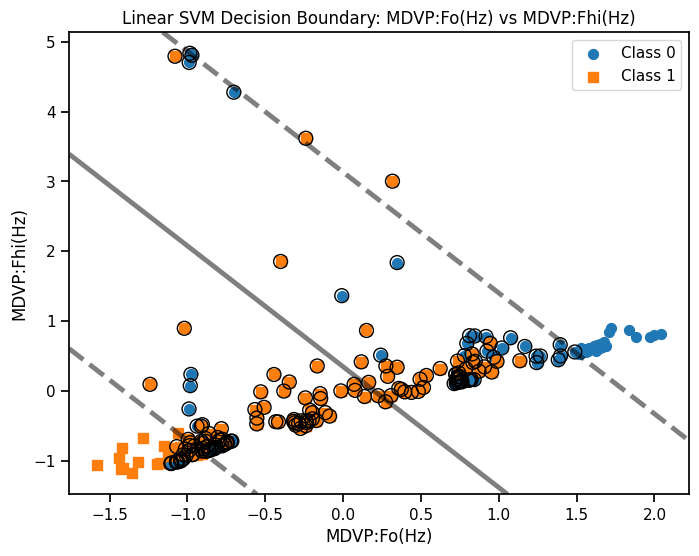

In [90]:
# Select two features for visualization 
feature1_index = 0  # Replace with the index of the first feature
feature2_index = 1  # Replace with the index of the second feature
X_2d = X_train_scaled[:, [feature1_index, feature2_index]]

# Plot the data points with colors representing the classes
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[y_train_resampled == 0, 0], X_2d[y_train_resampled == 0, 1], label='Class 0', marker='o', s=50) # Increased marker size
plt.scatter(X_2d[y_train_resampled == 1, 0], X_2d[y_train_resampled == 1, 1], label='Class 1', marker='s', s=50) # Increased marker size


# Fit the SVM model (using a linear kernel)
svm_model_2d = svm.SVC(kernel='linear')
svm_model_2d.fit(X_2d, y_train_resampled)

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_model_2d.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Highlight support vectors (without filling)
ax.scatter(svm_model_2d.support_vectors_[:, 0], svm_model_2d.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')


#Get Feature Names
feature_names = list(x__.columns)

plt.xlabel(feature_names[feature1_index])
plt.ylabel(feature_names[feature2_index])
plt.title(f"Linear SVM Decision Boundary: {feature_names[feature1_index]} vs {feature_names[feature2_index]}")
plt.legend()
plt.show()

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# --- Logistic Regression Model ---
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train_resampled)
logreg_predictions = logreg_model.predict(X_test_scaled)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print(f"Logistic Regression Accuracy: {logreg_accuracy}")

Logistic Regression Accuracy: 0.9230769230769231


Confusion Matrix for Logistic Regression:
[[ 5  2]
 [ 1 31]]

Misclassified Instances for Logistic Regression:
Number of misclassified instances: 3


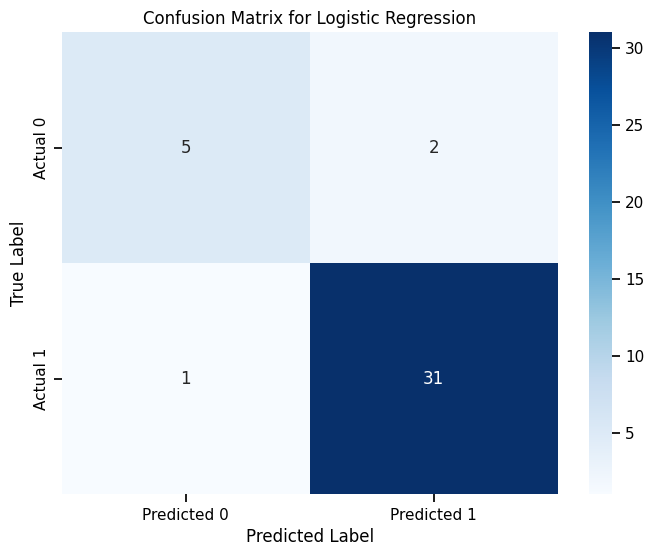

In [92]:
# --- Confusion Matrix for Logistic Regression---
cm_logreg = confusion_matrix(y_test, logreg_predictions)
print("Confusion Matrix for Logistic Regression:")
print(cm_logreg)

# Calculate and print misclassified instances for Logistic Regression
misclassified_indices_logreg = np.where(y_test != logreg_predictions)[0]
print("\nMisclassified Instances for Logistic Regression:")
print(f"Number of misclassified instances: {len(misclassified_indices_logreg)}")

# Optionally, print details about the misclassified instances
#for i in misclassified_indices_logreg:
#    print(f"Index: {i}, True Label: {y_test.iloc[i]}, Predicted Label: {logreg_predictions[i]}")
    # Access and print other relevant information about the misclassified instances (e.g. features)
# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [93]:
# --- KNN Model with Best Hyperparameters ---
best_knn = KNeighborsClassifier(metric='manhattan', n_neighbors=5, weights='distance') 
best_knn.fit(X_train_scaled, y_train_resampled)

# --- Make Predictions and Evaluate ---
y_pred = best_knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# --- Display Results ---
print("Accuracy:", accuracy)

Accuracy: 0.9230769230769231


Confusion Matrix for KNN:
[[ 6  1]
 [ 2 30]]

Misclassified Instances for KNN:
Number of misclassified instances: 3
Index: 1, True Label: 1, Predicted Label: 0
Index: 2, True Label: 1, Predicted Label: 0
Index: 34, True Label: 0, Predicted Label: 1


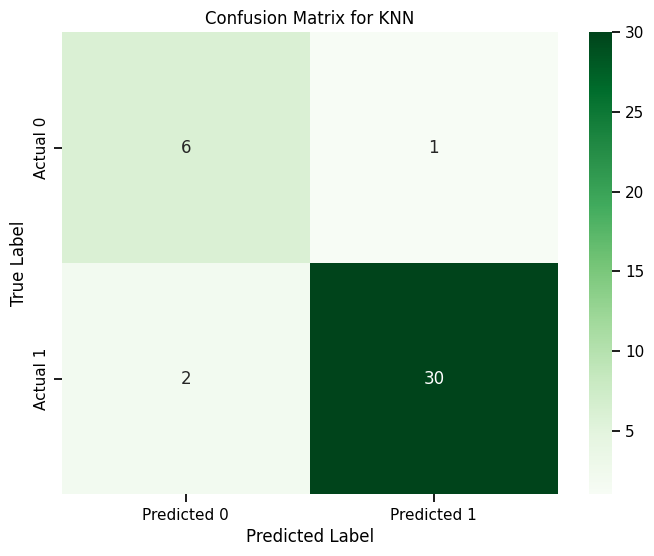

In [94]:
# --- Confusion Matrix for KNN ---
cm_knn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for KNN:")
print(cm_knn)

# Calculate and print misclassified instances for KNN
misclassified_indices_knn = np.where(y_test != y_pred)[0]
print("\nMisclassified Instances for KNN:")
print(f"Number of misclassified instances: {len(misclassified_indices_knn)}")

# Optionally, print details about the misclassified instances
for i in misclassified_indices_knn:
    print(f"Index: {i}, True Label: {y_test.iloc[i]}, Predicted Label: {y_pred[i]}")
    # Access and print other relevant information about the misclassified instances (e.g. features)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN')
plt.show()

Decision Tree Accuracy: 0.8974358974358975
Confusion Matrix for Decision Tree:
[[ 4  3]
 [ 1 31]]


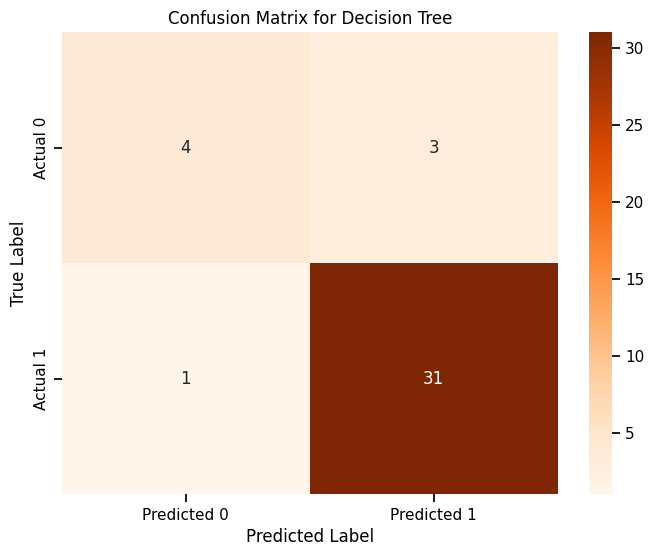

In [95]:
from sklearn.tree import DecisionTreeClassifier
# --- Decision Tree Model ---
dt_model = DecisionTreeClassifier(random_state=7) # You can adjust hyperparameters
dt_model.fit(X_train_scaled, y_train_resampled)
dt_predictions = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")

# --- Confusion Matrix for Decision Tree ---
cm_dt = confusion_matrix(y_test, dt_predictions)
print("Confusion Matrix for Decision Tree:")
print(cm_dt)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges',  # Use a different colormap
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

Random Forest Accuracy: 0.9230769230769231
Confusion Matrix for Random Forest:
[[ 5  2]
 [ 1 31]]


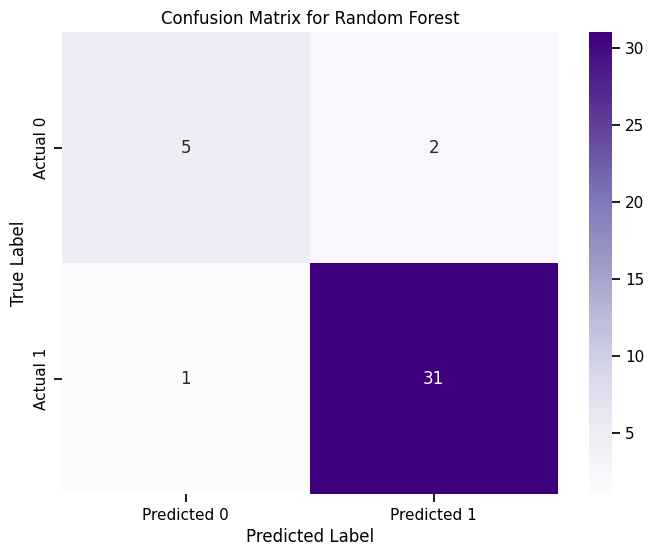

In [96]:
from sklearn.ensemble import RandomForestClassifier

# --- Random Forest Model ---
rf_model = RandomForestClassifier(random_state=7)  # You can adjust hyperparameters
rf_model.fit(X_train_scaled, y_train_resampled)
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

# --- Confusion Matrix for Random Forest ---
cm_rf = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples',  # Use a different colormap
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

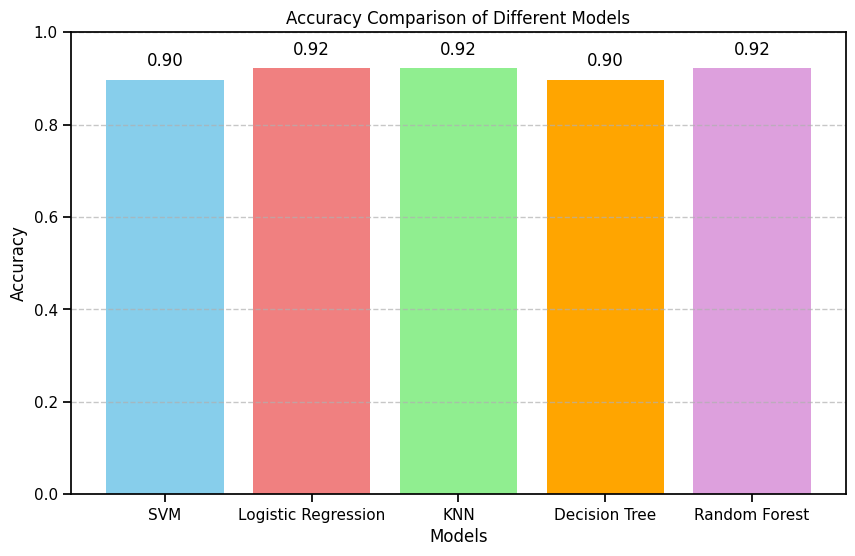

In [97]:
# prompt: vizualization to show the accuracy for each model

import matplotlib.pyplot as plt

# Assuming you have the accuracy scores for each model stored in variables
# like svm_accuracy, logreg_accuracy, knn_accuracy, dt_accuracy, rf_accuracy

model_names = ['SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracies = [svm_accuracy, logreg_accuracy, accuracy, dt_accuracy, rf_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'plum'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Models")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a subtle grid

# Add accuracy values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom') # Added formatting

plt.show()

In [98]:
models = {"SVM": svm_model,"Logistic":logreg_model,"KNN":best_knn,"Decision tree":dt_model,"random forest":rf_model}

In [99]:
def predict_status(input_data):
    """Predicts the status based on user input for all models."""

    # 1. Get original feature columns
    original_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 
                         'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
                         'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
                         'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
                         'spread1', 'spread2', 'D2', 'PPE'] 

    # 2. Create DataFrame with original features
    input_df = pd.DataFrame([input_data], columns=original_features)

    # 3. Apply Feature Engineering 
    input_df['Jitter_Shimmer_Ratio'] = input_df['MDVP:Jitter(%)'] / input_df['MDVP:Shimmer']
    input_df['HNR_RPDE_Ratio'] = input_df['HNR'] / input_df['RPDE']
    input_df['Spread1_Spread2_Diff'] = input_df['spread1'] - input_df['spread2']
    input_df['Jitter_Shimmer_Sum'] = input_df['MDVP:Jitter(%)'] + input_df['MDVP:Shimmer']
    input_df['HNR_Spread1_Product'] = input_df['HNR'] * input_df['spread1']
    input_df['PPE_log'] = np.log(input_df['PPE'] + 1e-10)
    input_df['Fo_Category'] = pd.cut(input_df['MDVP:Fo(Hz)'], bins=[0, 150, 200, float('inf')], labels=['Low', 'Mid', 'High'])
    input_df['Shimmer_MovingAvg'] = input_df['MDVP:Shimmer'].rolling(window=3, center=True, min_periods=1).mean()
     # 4. One-hot encoding
    input_df = pd.get_dummies(input_df, columns=['Fo_Category'], drop_first=True)

     # 6. Scale the input data
    input_scaled = scaler.transform(input_df)
  
    predictions = {}
    for name, model in models.items():
        prediction = model.predict(input_scaled)[0]
        predictions[name] = prediction
    return predictions
    



does_have_count = 0
input_values = [124.44500,135.06900,117.49500,0.00431,0.00003,0.00141,0.00167,0.00422,0.02184,0.19700,0.01241,0.01024,0.01685,0.03724,0.00479,25.13500,0.553134,0.775933,-6.650471,0.254498,1.840198,0.103561]
predictions = predict_status(input_values)
for model_name, predicted_status in predictions.items():
    if predicted_status == 1 :
        does_have_count += 1
    print(f"Model: {model_name}, Predicted Status: {predicted_status}")
print("..............................................................................")
    # Final Prediction

if does_have_count >= 3:
    print("Final prediction: The person does have Parkinson's Disease")
else:
    print("Final prediction: The person does NOT have Parkinson's Disease")

Model: SVM, Predicted Status: 0
Model: Logistic, Predicted Status: 0
Model: KNN, Predicted Status: 0
Model: Decision tree, Predicted Status: 0
Model: random forest, Predicted Status: 0
..............................................................................
Final prediction: The person does NOT have Parkinson's Disease


In [100]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [101]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import  shuffle
import tensorflow as tf

In [102]:
x_training = []
y_training = []
image_size = 190
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels :
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        x_training.append(img) 
        y_training.append(i) 
        
        
for i in labels :
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        x_training.append(img) 
        y_training.append(i) 
        
        
x_training = np.array(x_training)
y_training = np.array(y_training)

In [103]:
x_training,y_training = shuffle(x_training,y_training,random_state=100)
x_training.shape

(3264, 190, 190, 3)

In [104]:
x_training,x_test,y_training,y_test = train_test_split(x_training,y_training,test_size=0.1,random_state=100)

In [105]:
y_train_new = []
for i in y_training:
    if isinstance(i, np.ndarray) and i.dtype.kind in 'biufc':  # Check if it's a numeric array
        # Assuming label is indicated by the index of the maximum value
        label_index = np.argmax(i)
        label_string = labels[label_index]
    else:
        label_string = i  # Assume it's already the label string
    y_train_new.append(labels.index(label_string))

y_training = y_train_new
y_training = tf.keras.utils.to_categorical(y_training)

# ... (rest of your code for y_test remains the same)

# ... (your code for y_train_new remains the same)

y_test_new = []
for i in y_test:
    if isinstance(i, np.ndarray) and i.dtype.kind in 'biufc':  # Check if it's a numeric array
        # Assuming label is indicated by the index of the maximum value
        label_index = np.argmax(i)
        label_string = labels[label_index]
    else:
        label_string = i  # Assume it's already the label string
    y_test_new.append(labels.index(label_string))

y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [106]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(190,190,3)))
model.add(Conv2D(64,(3,3),activation = 'relu')) 

#model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(190,190,3)))
#model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation = 'relu')) 
model.add(Conv2D(64,(3,3),activation = 'relu')) 
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu')) 
model.add(Conv2D(128,(3,3),activation = 'relu')) 
model.add(Conv2D(128,(3,3),activation = 'relu')) 
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu')) 
model.add(Conv2D(256,(3,3),activation = 'relu')) 
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation = 'softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [107]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 188, 188, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 186, 186, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 93, 93, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 93, 93, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 91, 91, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 89, 89, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 89, 89, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 44, 44, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 44, 44, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 42, 42, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 40, 40, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 38, 38, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 17, 17, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,592,772 (28.96 MB)

 Trainable params: 7,592,772 (28.96 MB)

 Non-trainable params: 0 (0.00 B)

In [108]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [109]:
# from tensorflow.keras.models import load_model
# import pickle
# model_path = "/kaggle/working/my_model.h5"
# history_path = "/kaggle/working/history.pkl"
# history = model.fit(x_training,y_training,epochs=25,validation_split=0.1)
# model.save(model_path)
# with open(history_path, 'wb') as f:
#     pickle.dump(history, f)

In [110]:
from tensorflow.keras.models import load_model
import pickle

model = load_model("/kaggle/input/m-bt19/my_model (2).h5")
with open("/kaggle/input/m-bt19/history (2).pkl", 'rb') as f:
    history = pickle.load(f)

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

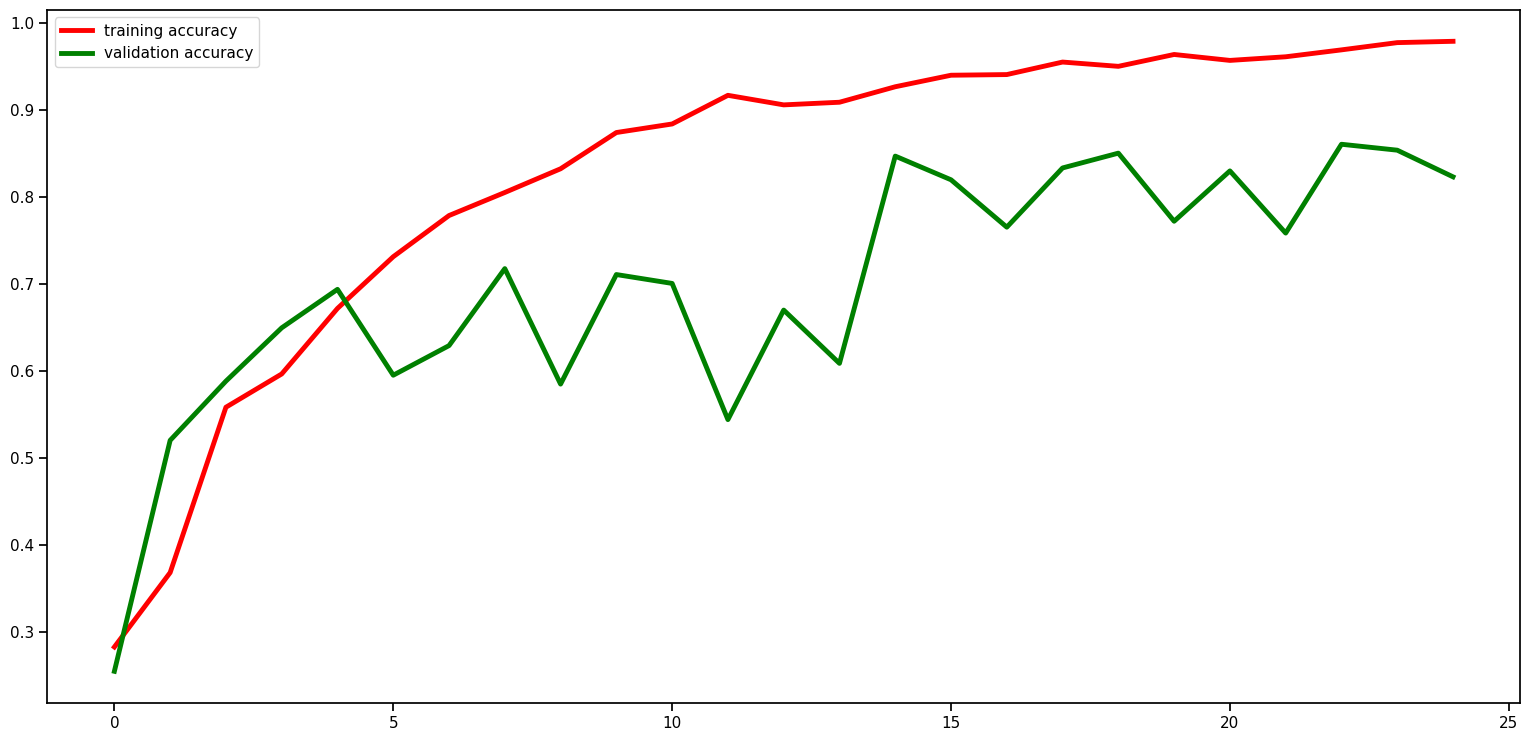

In [112]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(19,9))
plt.plot(epochs,acc,'r',label='training accuracy')
plt.plot(epochs,val_acc,'g',label='validation accuracy')
plt.legend(loc='upper left')
plt.show()

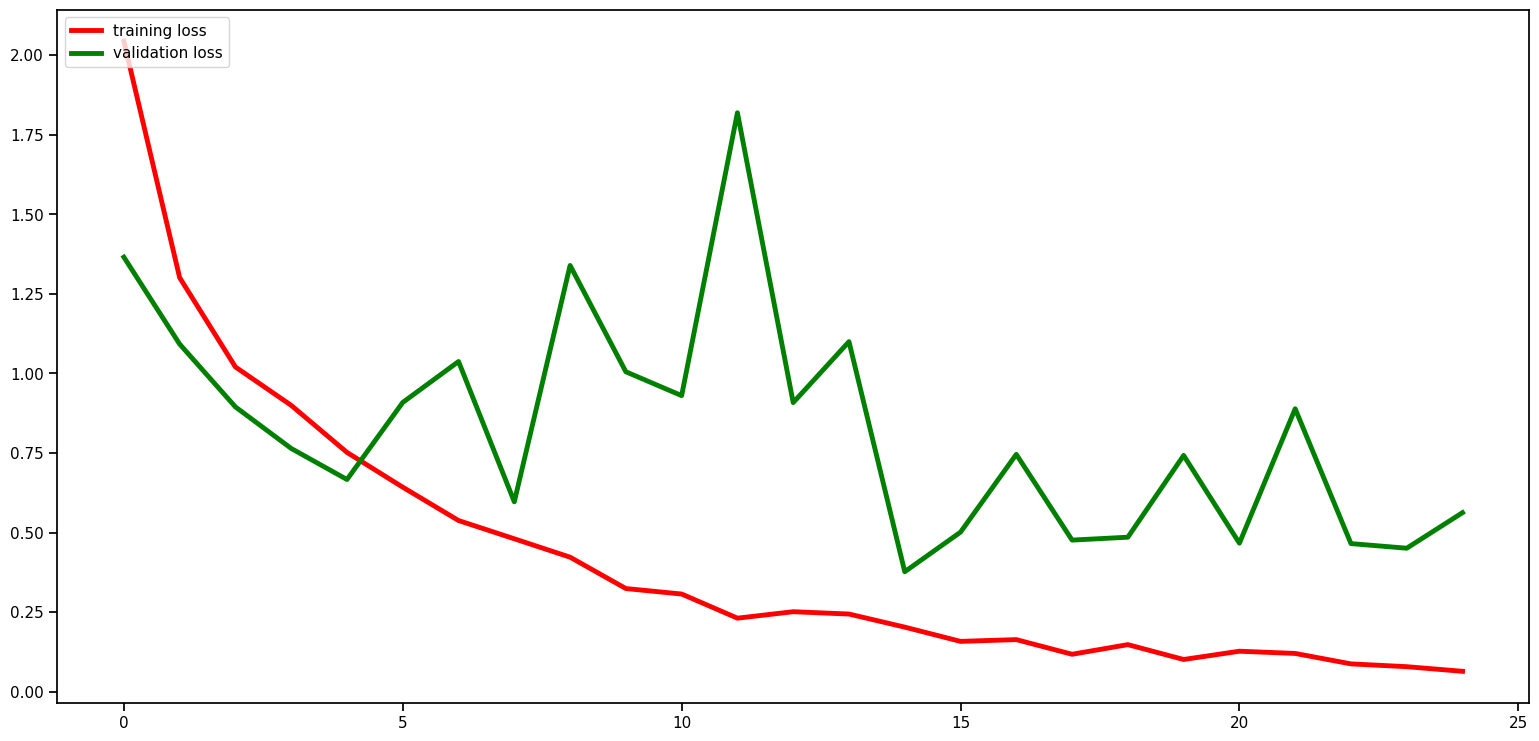

In [113]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(19,9))
plt.plot(epochs,loss,'r',label='training loss')
plt.plot(epochs,val_loss,'g',label='validation loss')
plt.legend(loc='upper left')
plt.show()

In [114]:
img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(19).jpg')
img = cv2.resize(img,(190,190))
img_array = np.array(img)
img_array.shape

(190, 190, 3)

In [115]:
img_array = img_array.reshape(1,190,190,3)
img_array.shape

(1, 190, 190, 3)

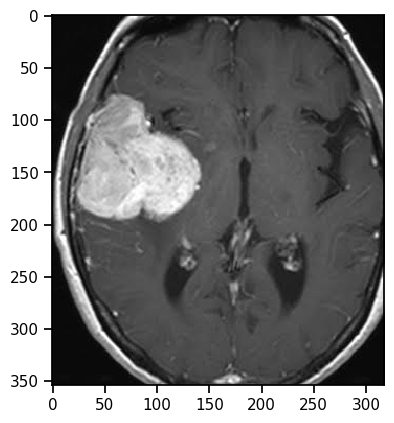

In [116]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(19).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [117]:
finalllll = model.predict(img_array)
indices = finalllll.argmax()

# Get the predicted tumor type from the 'labels' list
predicted_tumor_type = labels[indices]


print(f"The model predicts that the image shows a {predicted_tumor_type}.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
The model predicts that the image shows a meningioma_tumor.


In [118]:
    # # KNN Model
    # knn = KNeighborsClassifier(n_neighbors=5)
    # knn.fit(pca_train_oversampled, y_train_oversampled)
    # y_pred_knn = knn.predict(pca_test)
    # accuracy_scores_knn.append(accuracy_score(y_val_fold, y_pred_knn))

    # # SVC Model
    # sv = SVC()
    # sv.fit(pca_train_oversampled, y_train_oversampled)
    # y_pred_sv = sv.predict(pca_test)
    # accuracy_scores_sv.append(accuracy_score(y_val_fold, y_pred_sv))

    # # Random Forest Model
    # rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    # rf_model.fit(pca_train_oversampled, y_train_oversampled)
    # y_pred_rf = rf_model.predict(pca_test)
    # accuracy_scores_rf.append(accuracy_score(y_val_fold, y_pred_rf))

    # # Decision Tree Model
    # dt_model = DecisionTreeClassifier(random_state=42)
    # dt_model.fit(pca_train_oversampled, y_train_oversampled)
    # y_pred_dt = dt_model.predict(pca_test)
    # accuracy_scores_dt.append(accuracy_score(y_val_fold, y_pred_dt))

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [120]:
path = os.listdir('/kaggle/input/brain-tumor-classification-mri/Training')
classes = {'no_tumor': 0, 'pituitary_tumor': 1, 'meningioma_tumor': 1, 'glioma_tumor': 1}

In [121]:
import cv2
X, Y = [], []
for cls in classes:
    # Correct the path to directly access the class folders inside /content/Training
    pth = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training', cls)  # Use os.path.join for platform compatibility 
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)  # Use os.path.join here as well
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [122]:
np.unique(Y)

array([0, 1])

In [123]:
X = np.array(X)
y = np.array(Y)
pd.Series(Y).value_counts()

1    2475
0     395
Name: count, dtype: int64

In [124]:
X.shape

(2870, 200, 200)

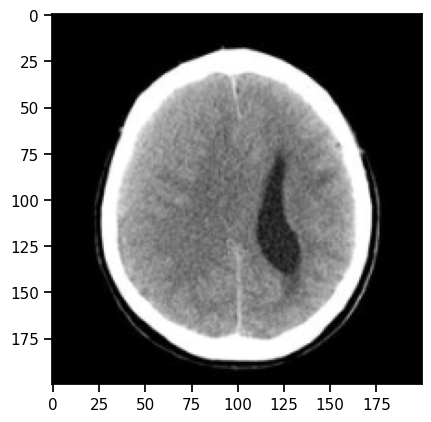

In [125]:
plt.imshow(X[19], cmap='gray')

In [126]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(2870, 40000)

In [127]:
# from sklearn.model_selection import train_test_split, StratifiedKFold
# from sklearn.metrics import accuracy_score
# from imblearn.over_sampling import RandomOverSampler
# from sklearn.decomposition import PCA
# from sklearn.tree import DecisionTreeClassifier



# xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

# # Cross-validation setup
# skf = StratifiedKFold(n_splits=5)
# accuracy_scores_dt = []

# # Cross-validation loop
# for train_index, val_index in skf.split(xtrain, ytrain):
#     X_train_fold, X_val_fold = xtrain[train_index], xtrain[val_index]
#     y_train_fold, y_val_fold = [ytrain[i] for i in train_index], [ytrain[i] for i in val_index]

#     # Oversample ONLY the training data of this fold
#     oversampler = RandomOverSampler(random_state=42)
#     X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_fold, y_train_fold)
    
#     # Normalize data for this fold (before applying PCA)
#     X_train_oversampled = X_train_oversampled / 255
#     X_val_fold = X_val_fold / 255  

#     # Apply PCA to the normalized, oversampled training data of this fold
#     pca = PCA(.98) 
#     pca_train_oversampled = pca.fit_transform(X_train_oversampled)
#     pca_test = pca.transform(X_val_fold)  

#     # Decision Tree Model
#     dt_model = DecisionTreeClassifier(random_state=42)
#     dt_model.fit(pca_train_oversampled, y_train_oversampled)
#     y_pred_dt = dt_model.predict(pca_test)
#     accuracy_scores_dt.append(accuracy_score(y_val_fold, y_pred_dt))


In [128]:
# # Calculate average accuracy score
# avg_accuracy_dt = np.mean(accuracy_scores_dt)
# print(f"Average Accuracy (Decision Tree): {avg_accuracy_dt}")

In [129]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [130]:
from imblearn.over_sampling import RandomOverSampler


# Instantiate the RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42) 

# Resample the training data
xtrain_resampled, ytrain_resampled = oversampler.fit_resample(xtrain, ytrain)

In [131]:
xtrain_resampled.shape, xtest.shape

((3984, 40000), (574, 40000))

In [132]:
print(xtrain_resampled.max(),xtrain_resampled.min())
print(xtest.max(), xtest.min())
xtrain_resampled = xtrain_resampled/255
xtest = xtest/255
print(xtrain_resampled.max(), xtrain_resampled.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [133]:
from sklearn.decomposition import PCA
pca = PCA(.98)
pca_train = pca.fit_transform(xtrain_resampled)
pca_test = pca.transform(xtest)

In [134]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [135]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(pca_train, ytrain_resampled)
knn_predictions = knn.predict(pca_test) 
knn_accuracy = accuracy_score(ytest, knn_predictions)

Confusion Matrix for KNN:
[[ 69  22]
 [ 33 450]]
KNN Accuracy: 0.9041811846689896


<function matplotlib.pyplot.show(close=None, block=None)>

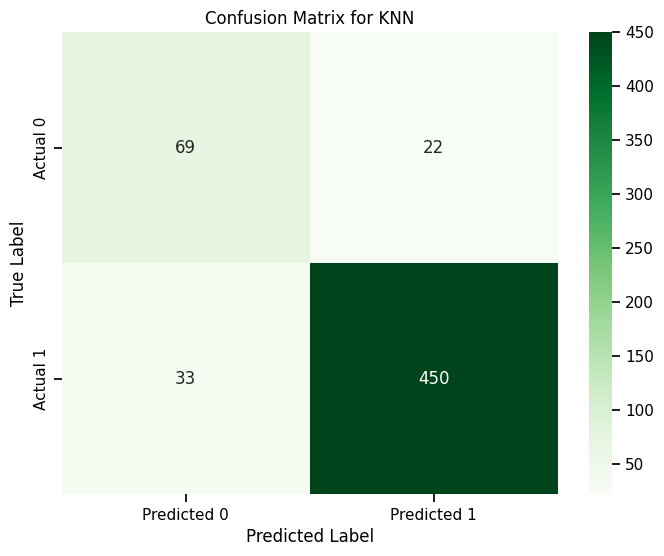

In [136]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your existing code for training and evaluating the KNN model) ...

# Generate the confusion matrix
cm_knn = confusion_matrix(ytest, knn_predictions)  # Assuming knn_predictions are the predictions from your KNN model

# Print the confusion matrix
print("Confusion Matrix for KNN:")
print(cm_knn)
print("KNN Accuracy:", knn_accuracy)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens", 
            xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN")
plt.show

In [137]:
sv = SVC()
sv.fit(pca_train, ytrain_resampled)
sv_predictions = sv.predict(pca_test)
sv_accuracy = accuracy_score(ytest, sv_predictions)

Confusion Matrix for SVC:
[[ 69  22]
 [ 11 472]]
SVC Accuracy: 0.9425087108013938


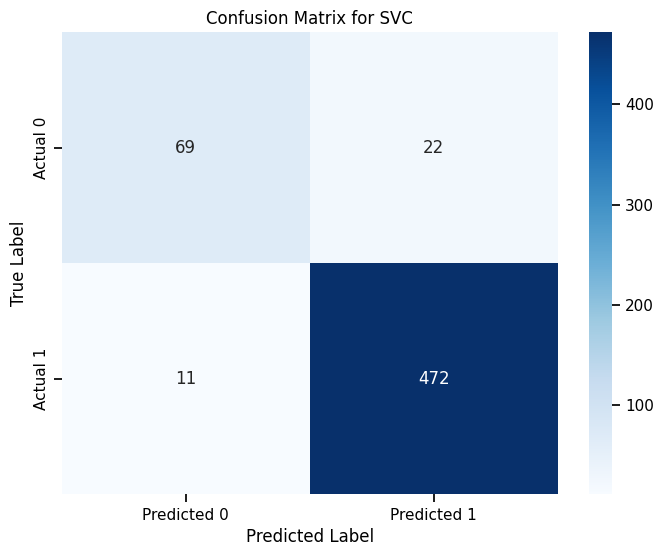

In [138]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your existing code for training and evaluating the SVC model) ...

# Generate the confusion matrix
cm = confusion_matrix(ytest, sv_predictions)  # Assuming sv_predictions are the predictions from your SVC model

# Print the confusion matrix
print("Confusion Matrix for SVC:")
print(cm)
print("SVC Accuracy:", sv_accuracy)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVC")
plt.show()

In [139]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # You can tune hyperparameters
rf_model.fit(pca_train, ytrain_resampled)
rf_predictions = rf_model.predict(pca_test)
rf_accuracy = accuracy_score(ytest, rf_predictions)

Confusion Matrix for Random Forest:
[[ 24  67]
 [  0 483]]
Random Forest Accuracy: 0.8832752613240418


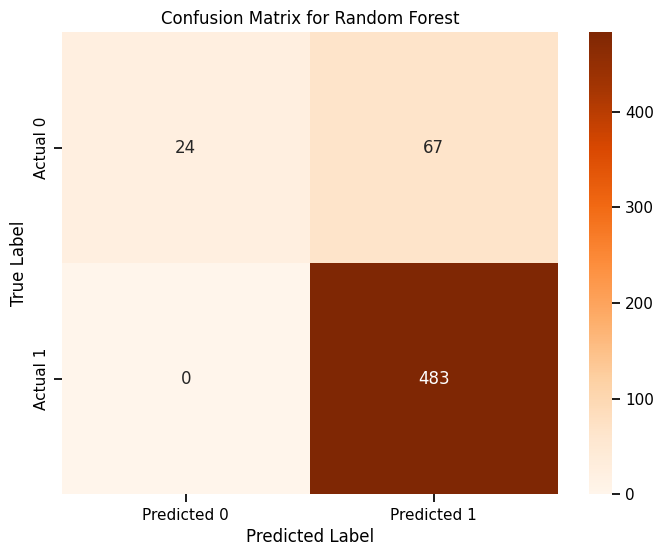

In [140]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your existing code for training and evaluating the RF model) ...

# Generate the confusion matrix
cm_rf = confusion_matrix(ytest, rf_predictions)  # Assuming rf_predictions are the predictions from your RF model

# Print the confusion matrix
print("Confusion Matrix for Random Forest:")
print(cm_rf)
print("Random Forest Accuracy:", rf_accuracy)


# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges",  # You can choose other color maps
            xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [141]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import SelectFromModel
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from sklearn.metrics import accuracy_score


# # 1. Feature Selection with Random Forest:
# rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_selector.fit(pca_train, ytrain_resampled) 
# selector = SelectFromModel(rf_selector, prefit=True, threshold="median")
# X_train_selected = selector.transform(pca_train)
# X_test_selected = selector.transform(pca_test)


# # 2. Address Class Imbalance (SMOTE + Undersampling):
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, ytrain_resampled) 
# undersampler = RandomUnderSampler(random_state=42)
# X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)



# dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=1, min_samples_split=2, random_state=42)
# dt_model.fit(X_train_resampled, y_train_resampled)
# dt_accuracy = dt_model.score(X_test_selected, ytest)
# print(f"Decision Tree Accuracy (with feature selection and balancing): {dt_accuracy:.4f}")


# #Scale data after PCA
#     scaler = StandardScaler()
#     pca_train_oversampled = scaler.fit_transform(pca_train_oversampled)
#     pca_test = scaler.transform(pca_test)

In [142]:
from sklearn.tree import DecisionTreeClassifier

# Directly create the Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Fit the model to your training data
best_dt_model.fit(pca_train, ytrain_resampled)

# Evaluate the model
dt_accuracy = best_dt_model.score(pca_test, ytest)
print(f"Decision Tree Accuracy: {dt_accuracy:}")

Decision Tree Accuracy: 0.8588850174216028


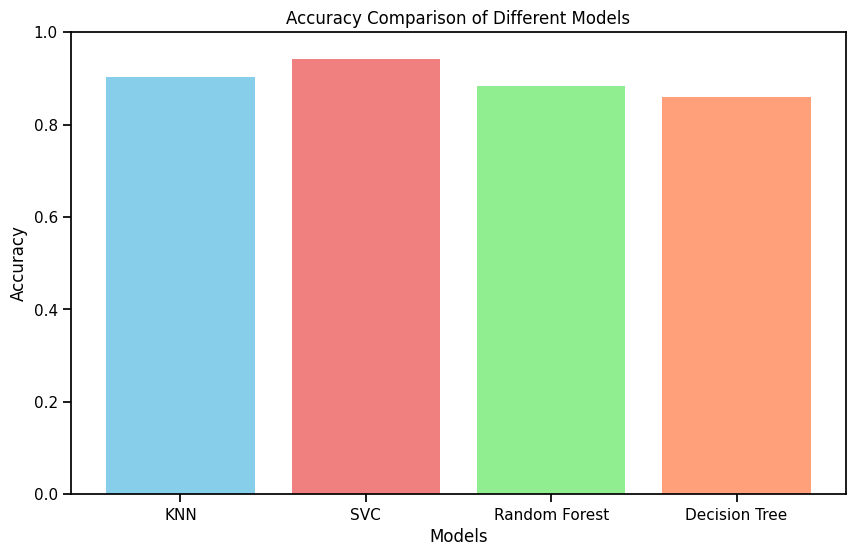

In [143]:
import matplotlib.pyplot as plt

# Accuracy scores for each model (replace with your actual accuracy scores)
model_names = ['KNN', 'SVC', 'Random Forest', 'Decision Tree']
accuracy_scores = [knn_accuracy, sv_accuracy, rf_accuracy, dt_accuracy]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Models")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()

In [ ]:
import cv2
import numpy as np
from sklearn.decomposition import PCA

# Assuming 'knn', 'sv', and 'pca' are already defined and trained

def predict_image(image_path):
    """Predicts the class of an image using the trained KNN and SVC models.

    Args:
        image_path: The path to the image file.

    Returns:
        A tuple containing the KNN prediction, SVC prediction, and the processed image.
    """
    img = cv2.imread(image_path, 0)  # Load image in grayscale
    img = cv2.resize(img, (200, 200))  # Resize to match training data
    img_flat = img.reshape(1, -1)  # Flatten the image
    img_flat = img_flat / 255  # Normalize pixel values
    img_pca = pca.transform(img_flat)  # Apply PCA transformation

    knn_prediction = knn.predict(img_pca)[0]  # Get KNN prediction
    sv_prediction = sv.predict(img_pca)[0]  # Get SVC prediction
    rf_pred = rf_model.predict(img_pca)[0]
    dt_pred = dt_model.predict(img_pca)[0]

    return knn_prediction, sv_prediction,rf_pred,dt_pred, img

# Get the image path from the user
image_path = input("Enter the path to the image: ")

# Predict the class of the image
knn_prediction, sv_prediction,rf_pred,dt_pred, img = predict_image(image_path)

# Print the predictions with explanations
print("KNN Prediction:", knn_prediction)
print("SVC Prediction:", sv_prediction)
print("RF Prediction:", rf_pred)
print("DT Prediction:", dt_pred)

# Add explanations for 0 and 1
print("\nPrediction Explanation:")
print("0 means the image is predicted to have no tumor (no_tumor).")
print("1 means the image is predicted to have a tumor (pituitary_tumor, meningioma_tumor, or glioma_tumor).") 

# Display the image (optional)
plt.imshow(img, cmap='gray')
plt.title("Input Image")
plt.show()